In [ ]:
#1. add questions at least answer boxes?

In [1]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Preliminaries

Authored by *David J. Heeger*  2/11/2004<br>
Translated into Python by *Chrysa Papadaniil* 7/21 <br>

To begin, you need to define two pathnames to keep track of where the fmriTools and CannedData are.

In [2]:
#Paths for tutorials and for data
data_path = os.getcwd() + '/data/CannedData_DS/'

## Load the data 

This data directory contains the following files:
    
DS030975+06+Bold_030314-header.txt	
DS030975+06+Bold_030314.hdr		
DS030975+06+Bold_030314.img		
ROImask.hdr
ROImask.img

The BOLD fMRI data are in DS030975+06+Bold_030314.img

The file my-mask.img contains a mask that was saved out from fsl,
indicating the pixels that were active in the fMRI expeiment.

In [3]:
# Load the fMRI data
epi = nib.load(data_path + '/06+Bold_030314/DS030975+06+Bold_030314.img').get_fdata()
epi_header = nib.load(data_path + '/06+Bold_030314/DS030975+06+Bold_030314.img').header

In [4]:
#Load the mask:
roi = nib.load(data_path + '/06+Bold_030314/ROImask.img').get_fdata()
roi_header = nib.load(data_path + '/06+Bold_030314/ROImask.img').header

pixdim[1,2,3] should be positive; setting to abs of pixdim values
pixdim[1,2,3] should be positive; setting to abs of pixdim values


In [5]:
# View the mask images in sequence with a jupyter widget 
@widgets.interact(slice=widgets.IntSlider(min=0, max=roi.shape[2]-1, step=1, value=0))
def plot_mask(slice):
    fig, ax = plt.subplots(1, 1, figsize=[10,10])
    ax.imshow(np.rot90(roi[:, :, slice]),'gray')
    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

interactive(children=(IntSlider(value=0, description='slice', max=34), Output()), _dom_classes=('widget-intera…

Remember that it's always a good idea to look at your data.

Display a movie (over time) of a single slice from the bold images:

In [7]:
@widgets.interact(tp = widgets.IntSlider(min=0, max=epi.shape[3]-1, step=1, value=0))
def plot_functional(tp):
    slice = 15
    fig, ax = plt.subplots(1, 1, figsize=[10,10])
    ax.imshow(np.rot90(epi[:, :, slice, tp]),'gray')
    fig.subplots_adjust(wspace=0, hspace=0)
    plt.show()

interactive(children=(IntSlider(value=0, description='tp', max=130), Output()), _dom_classes=('widget-interact…

How many voxels are in the ROI? We can use numpy's "count_nonzero" function to figure out.

In [8]:
roi_size = np.count_nonzero(roi)
roi_size

213

How long (number of temporal frames) are the time series?

In [9]:
num_frames = np.size(epi,3)
num_frames

131

Pick out the time series for those voxels. We will produce a matrix of time series data in which each column corresponds to the time series from one of the active voxels. The size of the matrix is n_voxels by n_time_points.

In [10]:
t_series = epi[np.nonzero(roi)]

And let's plot the time series from all of the voxels, superimposed on top of one antoher:

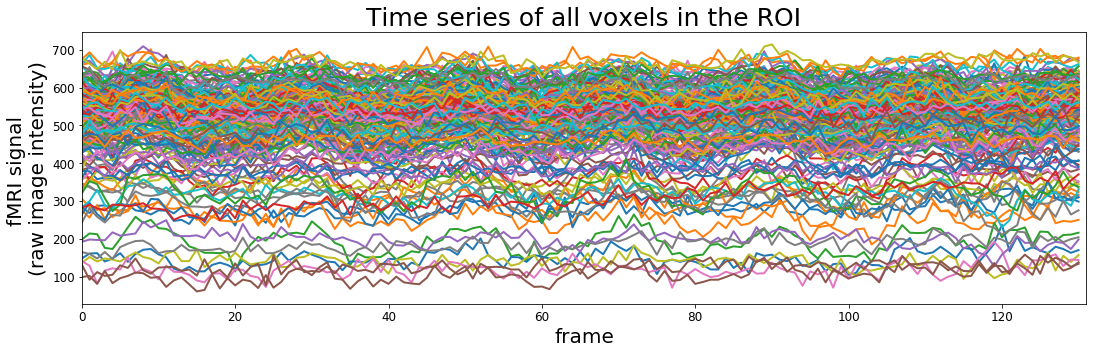

In [15]:
# Create an empty plot with defined aspect ratio
fig, ax = plt.subplots(1, 1, figsize=[18, 5])

for _ in range(0, t_series.shape[0]-1):
    ax.plot(t_series[_,:], lw=2)
    
ax.set_xlim([0, t_series.shape[1]])
ax.set_xlabel('frame', fontsize=20)
ax.set_ylabel('fMRI signal \n(raw image intensity)', fontsize=20)
ax.set_title('Time series of all voxels in the ROI', fontsize=25)
ax.tick_params(labelsize=12)

plt.show()

Notice that they all have a different baseline/mean intensity. Let's fix that.

In [16]:
baseline = np.mean(t_series, axis = 1)
percent_t_series = 100 * (np.transpose(t_series)/baseline - 1)

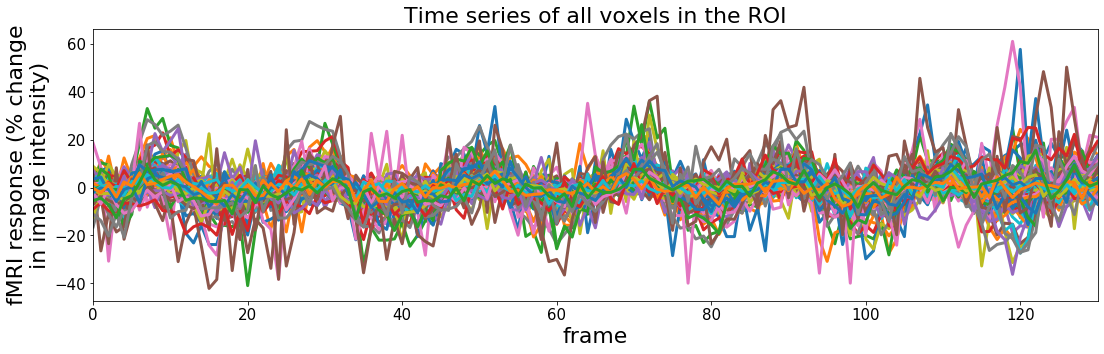

In [17]:
#Plot it
fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(percent_t_series, lw=3)
ax.set_xlim([0, len(percent_t_series)-1])
ax.set_xlabel('frame', fontsize=22)
ax.set_ylabel('fMRI response (% change\nin image intensity)', fontsize=22)
ax.set_title('Time series of all voxels in the ROI', fontsize=22)
ax.tick_params(labelsize=15)
plt.show()

Plot the mean percent time series. Notice how here we take the mean across the rows of the matrix (i.e., mean across voxels instead of the mean across time).

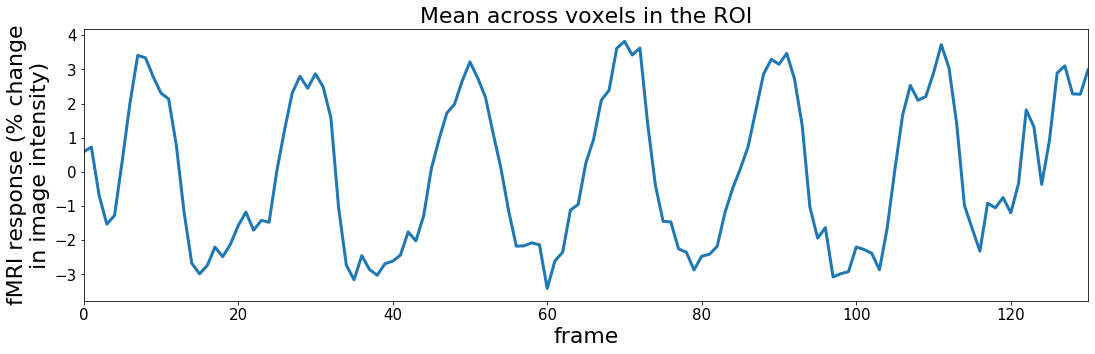

In [107]:
#Plot it
fig, ax = plt.subplots(1, 1, figsize=[18, 5])
ax.plot(np.mean(percent_t_series,1), lw=3)
ax.set_xlim([0, len(percent_t_series)-1])
ax.set_xlabel('frame', fontsize=22)
ax.set_ylabel('fMRI response (% change\nin image intensity)', fontsize=22)
ax.set_title('Mean across voxels in the ROI', fontsize=22)
ax.tick_params(labelsize=15)
plt.show()